## Logic Gate

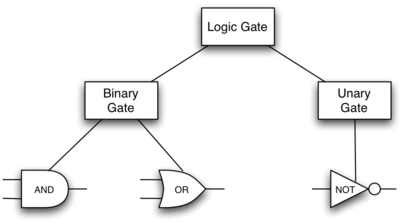

In [1]:
class LogicGate(object):
    def __init__(self, label):
        self.label = label
        self.output = None
        
    def get_label(self):
        return self.label
    
    def get_output(self):
        self.output = self.perform_gate_logic()
        return self.output

In [2]:
class BinaryGate(LogicGate):
    def __init__(self, label):
        LogicGate.__init__(self, label)
        
        self.pin_a = None
        self.pin_b = None
        
    def get_pin_a(self):
        if self.pin_a is None:
            return int(input("Enter Pin A input for gate {} -->".format(self.label)))
        else:
            return self.pin_a.get_from().get_output()
    
    def get_pin_b(self):
        if self.pin_b is None:
            return int(input("Enter Pin B input for gate {} -->".format(self.label)))    
        else:
            return self.pin_b.get_from().get_output()
    
    def set_next_pin(self, source):
        if self.pin_a is None:
            self.pin_a = source
        else:
            if self.pin_b is None:
                self.pin_b = source
            else:
                raise RuntimeError('Error: NO EMPTY PINS.')

In [3]:
class UnaryGate(LogicGate):
    def __init__(self, label):
        LogicGate.__init__(self, label)
        
        self.pin = None
        
    def get_pin(self):
        if self.pin is None:
            return int(input("Enter Pin input for gate {} -->".format(self.label)))
        else:
            return self.pin.get_from().get_output()
    
    def set_next_pin(self, source):
        if self.pin is None:
            self.pin = source
        else:
            raise RuntimeError("Error: NO EMPTY PINS.")

In [4]:
class AndGate(BinaryGate):
    def __init__(self, label):
        BinaryGate.__init__(self, label)
    
    def perform_gate_logic(self):
        a = self.get_pin_a()
        b = self.get_pin_b()
        return 1 if a == b == 1 else 0

In [5]:
class OrGate(BinaryGate):
    def __init__(self, label):
        BinaryGate.__init__(self, label)
        
    def perform_gate_logic(self):
        a = self.get_pin_a()
        b = self.get_pin_b()
        return 1 if a == 1 or b == 1 else 0

In [6]:
class NotGate(UnaryGate):
    def __init__(self, label):
        UnaryGate.__init__(self, label)
        
    def perform_gate_logic(self):
        pin = self.get_pin()
        return 1 if pin == 0 else 0

In [10]:
# class NorGate(BinaryGate):
#     def __init__(self, label):
#         BinaryGate.__init__(self, label)
        
#     def perform_gate_logic(self):
#         a = self.get_pin_a()
#         b = self.get_pin_b()
#         return 0 if a == 1 or b == 1 else 1

class NorGate(OrGate):
    def perform_gate_logic(self):
        return 1 if super().perform_gate_logic() == 0 else 0

In [11]:
# class NandGate(BinaryGate):
#     def __init__(self, label):
#         BinaryGate.__init__(self, label)
        
#     def perform_gate_logic(self):
#         a = self.get_pin_a()
#         b = self.get_pin_b()
#         return 1 if not (a == 1 and b == 1) else 0

class NandGate(AndGate):
    def perform_gate_logic(self):
        return 1 if super().perform_gate_logic() == 0 else 0

In [12]:
class XorGate(BinaryGate):
    def __init__(self, label):
        BinaryGate.__init__(self, label)
        
    def perform_gate_logic(self):
        a = self.get_pin_a()
        b = self.get_pin_b()
        return 1 if a !=  b else 0
        

In [13]:
g1 = AndGate("G1")
o1 = g1.get_output()
g2 = OrGate("G2")
o2 = g2.get_output()
g3 = NotGate("G3")
o3 = g3.get_output()
g4 = NorGate("G4")
o4 = g4.get_output()
g5 = NandGate("G5")
o5 = g5.get_output()
g6 = XorGate("G6")
o6 = g6.get_output()
print(o1, o2, o3, o4, o5, o6)

Enter Pin A input for gate G1 -->1
Enter Pin B input for gate G1 -->1
Enter Pin A input for gate G2 -->1
Enter Pin B input for gate G2 -->1
Enter Pin input for gate G3 -->1
Enter Pin A input for gate G4 -->1
Enter Pin B input for gate G4 -->1
Enter Pin A input for gate G5 -->1
Enter Pin B input for gate G5 -->1
Enter Pin A input for gate G6 -->1
Enter Pin B input for gate G6 -->1
1 1 0 0 0 0


In [17]:
g1 = XorGate("G1")
g1.get_output()

Enter Pin A input for gate G1 -->0
Enter Pin B input for gate G1 -->0


0

## Connector

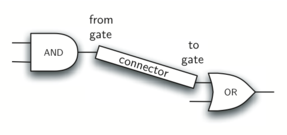

In [18]:
class Connector:
    def __init__(self, fgate, tgate):
        self.fromgate = fgate
        self.togate = tgate
        
        tgate.set_next_pin(self)
        
    def get_from(self):
        return self.fromgate
    
    def get_to(self):
        return self.togate

In [20]:
g1 = AndGate("G1")
g2 = AndGate("G2")
g3 = OrGate("G3")
g4 = NotGate("G4")
c1 = Connector(g1, g3)
c2 = Connector(g2, g3)
c3 = Connector(g3, g4)
g4.get_output()

Enter Pin A input for gate G1 -->1
Enter Pin B input for gate G1 -->1
Enter Pin A input for gate G2 -->1
Enter Pin B input for gate G2 -->1


0

In [54]:
g1 = AndGate("G1")

In [55]:
g4.get_pin()

Enter Pin A input for gate G1 -->1
Enter Pin B input for gate G1 -->1
Enter Pin A input for gate G2 -->1
Enter Pin B input for gate G2 -->1


1

In [128]:
g1 = AndGate("G1")
g2 = AndGate("g2")
g3 = OrGate("G3")
Connector(g1, g3)
Connector(g2, g3)
g4 = NotGate("G4")
Connector(g3, g4)
g4.get_output()

Enter Pin A input for gate G1 -->1
Enter Pin B input for gate G1 -->1
Enter Pin A input for gate g2 -->1
Enter Pin B input for gate g2 -->1


0

In [126]:
g1 = NandGate("G1")
g2 = NandGate("G2")
g3 = AndGate("G3")
Connector(g1, g3)
Connector(g2, g3)
g3.get_output()

Enter Pin A input for gate G1 -->1
Enter Pin B input for gate G1 -->1
Enter Pin A input for gate G2 -->1
Enter Pin B input for gate G2 -->1


0

In [127]:
g1 = AndGate("G1")
g2 = AndGate("G2")
g3 = NorGate("G3")
Connector(g1, g3)
Connector(g2, g3)
g3.get_output()

Enter Pin A input for gate G1 -->1
Enter Pin B input for gate G1 -->1
Enter Pin A input for gate G2 -->1
Enter Pin B input for gate G2 -->1


0

## Half Adder

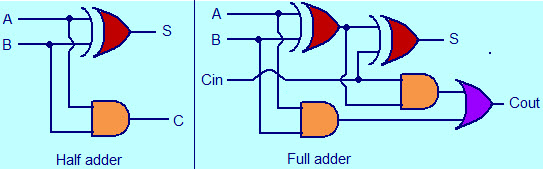

An adder is a digital circuit that performs addition of numbers. The half adder adds two binary digits called as augend and addend and produces two outputs as sum and carry; XOR is applied to both inputs to produce sum and AND gate is applied to both inputs to produce carry. 

In [24]:
class HalfAdder:
    def __init__(self, label):
        self.label = label
        
    def calculate(self):
        s = AndGate("SUM")
        c = XorGate("CARRY")
        rsum = s.get_output()
        rcarry = c.get_output()
        return rsum, rcarry

In [25]:
half_adder = HalfAdder("HalfAdder")

In [26]:
half_adder.calculate()

Enter Pin A input for gate SUM -->1
Enter Pin B input for gate SUM -->1
Enter Pin A input for gate CARRY -->1
Enter Pin B input for gate CARRY -->1


(1, 0)